In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Getting the training and test data


In [137]:
train_df = pd.read_csv(
    "/Users/rahulanil/garchomp/projects/kaggle/titanic/data/train.csv"
)
test_df = pd.read_csv("/Users/rahulanil/garchomp/projects/kaggle/titanic/data/test.csv")


Features are:

- PassengerId: nothing that i can learn from this (this I need for the sake of submitting the answer)
- Survived:
- Pclass: Class in which the passenger travelled
- Name: Name of the person traveling (Name has titles in the front of it form which i can get more data or i can engineer a feature using this)
- Sex: Male or Female
- Age: Age of the ticket holder
- SibSp: Number of siblings/ spouses on the ship
- Parch: number of parents/ children on the ship
- Ticket: (Ticket number) nothing i can learn from this
- Fare: amount payed for the ticket
- Cabin: Cabin number
- Embarked: Port of embarkation


In [138]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
display(train_df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


checking null values


In [140]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from this we can see we are missing values in the case of age and in the case of cabin number (cabin number is not needed so I think i can just leave that)


In [141]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finding the portion of people that survived in the wreckage


In [142]:
print(f"Total number of people on the ship: {train_df.count()}\n")
print(f"Survived: \n{train_df.Survived.value_counts()}")


Total number of people on the ship: PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Survived: 
0    549
1    342
Name: Survived, dtype: int64


much larger proportion of people died than survived


<AxesSubplot: ylabel='Survived'>

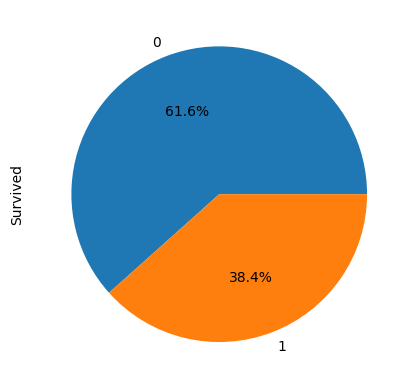

In [143]:
train_df["Survived"].value_counts().plot.pie(autopct="%1.1f%%")


### Looking at the Pclass col

1: first class cabins
2: second class cabins
3: third class cabins


In [144]:
train_df["Pclass"].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

There are much more people in the 3rd class but something unique that i did not notice when i was looking at the dataset the first time is that there are more people in first class than there are in second class


<AxesSubplot: ylabel='Pclass'>

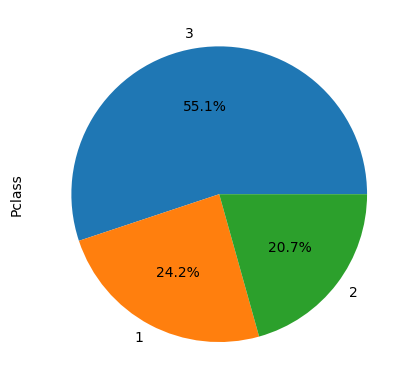

In [145]:
train_df["Pclass"].value_counts().plot.pie(autopct="%1.1f%%")


Looking at how Pclass affected survial


In [146]:
train_df.groupby(["Pclass", "Survived"])["Survived"].count()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='count'>

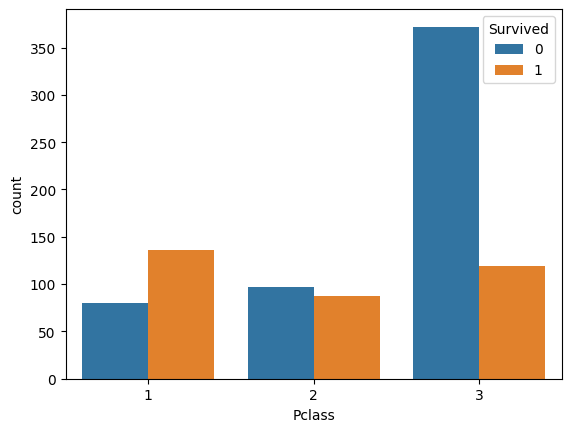

In [147]:
sns.countplot(data=train_df, x="Pclass", hue="Survived")


In [148]:
train_df.groupby(["Pclass"])["Survived"].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [149]:
print(
    pd.crosstab(train_df["Pclass"], train_df["Survived"], margins=True)
)  # this is a really good way of exploring data that i can really use.


Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


### Sex


In [150]:
train_df["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [151]:
train_df.groupby(["Sex"])["Survived"].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [152]:
train_df[train_df["Survived"] == 1].groupby(["Sex"])["Survived"].count()


Sex
female    233
male      109
Name: Survived, dtype: int64

from this we can see that females are much lower in number they survived more about 74% of females survived while only 18% of females survived


<AxesSubplot: xlabel='Sex', ylabel='count'>

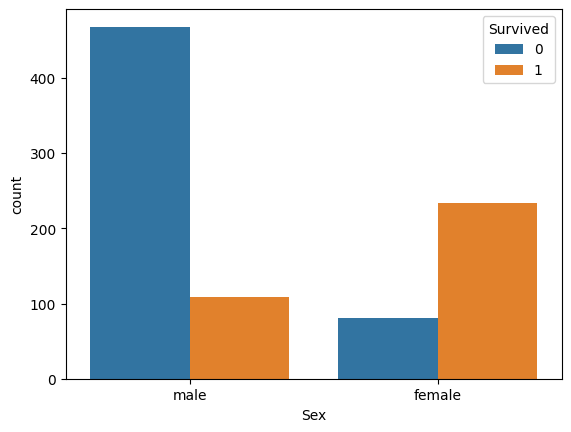

In [153]:
sns.countplot(data=train_df, x="Sex", hue="Survived")


Looking at the interaction between sex and class


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64

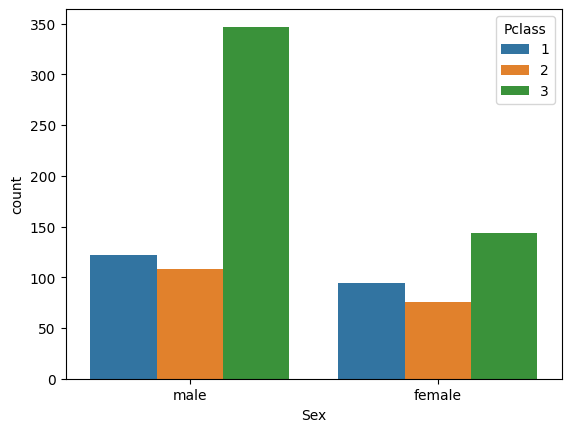

In [154]:
sns.countplot(data=train_df, x="Sex", hue="Pclass")
train_df.groupby(["Pclass", "Sex"])["Pclass"].count()


in each class even in the lower classes more females have survived


Crosstab visualization:
Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891


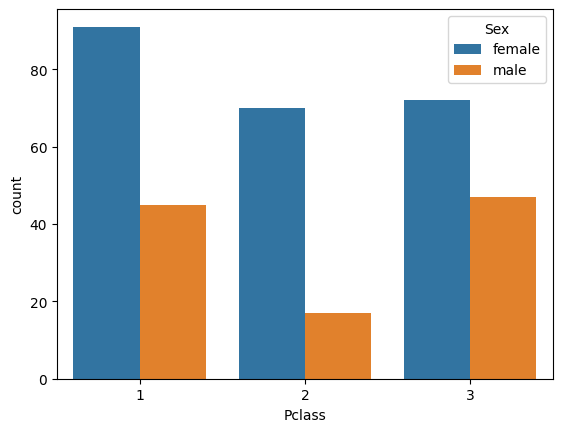

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

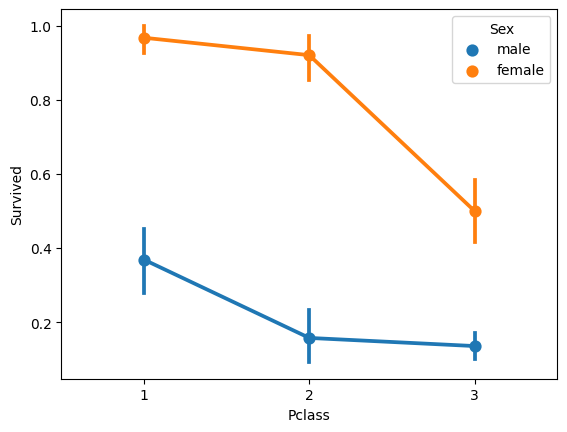

In [155]:
# Looking at the comparison b/w the men and women that survived the crash for each class of ticket
print(f"Crosstab visualization:")
print(
    pd.crosstab(
        [train_df["Pclass"], train_df["Sex"]], train_df["Survived"], margins=True
    )
)  # this is a really good way of exploring data that i can really use.

# the visualization of the above metric
sns.countplot(data=train_df[train_df["Survived"] == 1], x="Pclass", hue="Sex")
plt.show()

# this looks like a better way to visulize the above metric though
# this is when i want to look at the percentage of what survied in a class depending on Pclass
sns.pointplot(data=train_df, x="Pclass", y="Survived", hue="Sex")


In [156]:
train_df.groupby(["Pclass", "Sex"])["Survived"].mean()


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## Name col


In [157]:
train_df["Initials"] = train_df["Name"].str.extract("([A-Za-z]+)\.")
display(train_df["Initials"].value_counts())


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initials, dtype: int64

In [158]:
train_df["Family_Name"] = train_df["Name"].str.split(",").str.get(0)
display(train_df["Family_Name"].value_counts())


Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Family_Name, Length: 667, dtype: int64

This i can use later when i want to see if there is any other relation between the Initials and the sex when i am removing the unnecessary ones.


In [159]:
train_df.groupby(["Initials", "Sex"])["Initials"].count()


Initials  Sex   
Capt      male        1
Col       male        2
Countess  female      1
Don       male        1
Dr        female      1
          male        6
Jonkheer  male        1
Lady      female      1
Major     male        2
Master    male       40
Miss      female    182
Mlle      female      2
Mme       female      1
Mr        male      517
Mrs       female    125
Ms        female      1
Rev       male        6
Sir       male        1
Name: Initials, dtype: int64

In [160]:
train_df.groupby(["Initials", "Pclass"])["Initials"].count()


Initials  Pclass
Capt      1           1
Col       1           2
Countess  1           1
Don       1           1
Dr        1           5
          2           2
Jonkheer  1           1
Lady      1           1
Major     1           2
Master    1           3
          2           9
          3          28
Miss      1          46
          2          34
          3         102
Mlle      1           2
Mme       1           1
Mr        1         107
          2          91
          3         319
Mrs       1          42
          2          41
          3          42
Ms        2           1
Rev       2           6
Sir       1           1
Name: Initials, dtype: int64

In [161]:
print(
    pd.crosstab(
        [train_df["Initials"], train_df["Pclass"]], train_df["Survived"], margins=True
    )
)


Survived           0    1  All
Initials Pclass               
Capt     1         1    0    1
Col      1         1    1    2
Countess 1         0    1    1
Don      1         1    0    1
Dr       1         2    3    5
         2         2    0    2
Jonkheer 1         1    0    1
Lady     1         0    1    1
Major    1         1    1    2
Master   1         0    3    3
         2         0    9    9
         3        17   11   28
Miss     1         2   44   46
         2         2   32   34
         3        51   51  102
Mlle     1         0    2    2
Mme      1         0    1    1
Mr       1        70   37  107
         2        83    8   91
         3       283   36  319
Mrs      1         1   41   42
         2         4   37   41
         3        21   21   42
Ms       2         0    1    1
Rev      2         6    0    6
Sir      1         0    1    1
All              549  342  891


In [162]:
train_df.groupby(["Initials", "Pclass"])["Survived"].mean()


Initials  Pclass
Capt      1         0.000000
Col       1         0.500000
Countess  1         1.000000
Don       1         0.000000
Dr        1         0.600000
          2         0.000000
Jonkheer  1         0.000000
Lady      1         1.000000
Major     1         0.500000
Master    1         1.000000
          2         1.000000
          3         0.392857
Miss      1         0.956522
          2         0.941176
          3         0.500000
Mlle      1         1.000000
Mme       1         1.000000
Mr        1         0.345794
          2         0.087912
          3         0.112853
Mrs       1         0.976190
          2         0.902439
          3         0.500000
Ms        2         1.000000
Rev       2         0.000000
Sir       1         1.000000
Name: Survived, dtype: float64

from this we can see that we do need to deal with handlling "Dona" as well in the case of the test_df


In [163]:
test_df["Initials"] = test_df["Name"].str.extract("([A-Za-z]+)\.")
test_df["Initials"].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

## Age


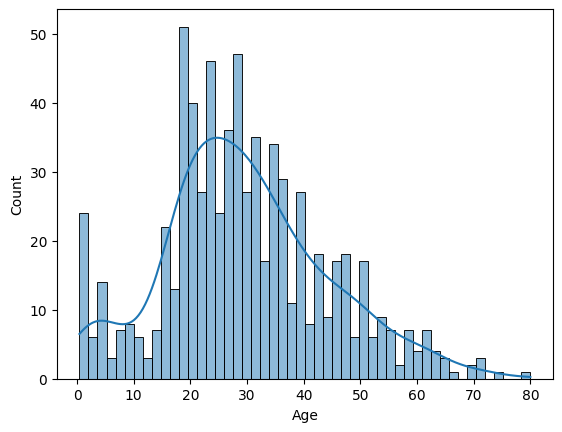

oldest person on the ship: 512.3292
youngest person on the ship: 0.0
average age of the people on the ship: 29.69911764705882


In [164]:
sns.histplot(train_df["Age"], bins=50, kde=True)
plt.show()

# what is the oldest person on the ship
print(f"oldest person on the ship: {train_df.Fare.max()}")
print(f"youngest person on the ship: {train_df.Fare.min()}")
print(f"average age of the people on the ship: {train_df.Age.mean()}")


The average age of the person that survived the incident was 28.3


<AxesSubplot: xlabel='Age', ylabel='Density'>

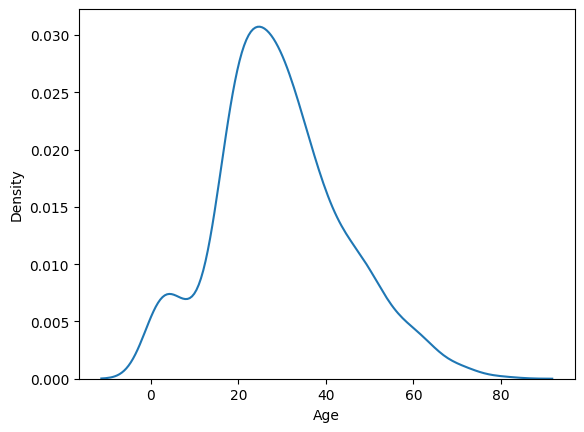

In [165]:
sns.kdeplot(data=train_df, x="Age")


In [166]:
train_df.groupby(["Survived"])["Age"].mean()


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [167]:
train_df.groupby(["Sex"])["Age"].mean()


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [168]:
train_df.groupby(["Sex", "Survived"])["Age"].mean()


Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age', ylabel='Count'>

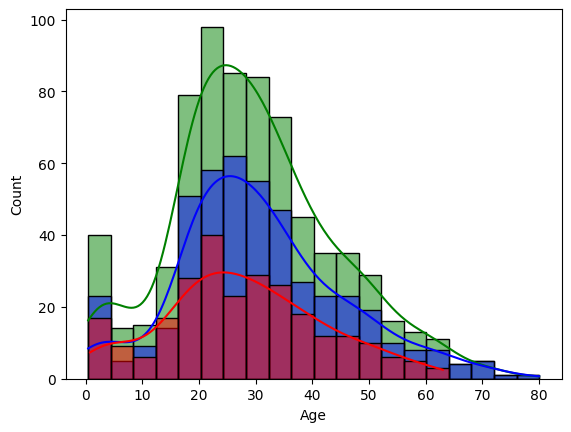

In [169]:
# doing the same as above but keeping the bins as the same
bins = np.histogram_bin_edges(train_df["Age"].dropna(), bins="auto")
sns.histplot(train_df["Age"], bins=bins, kde=True, color="green", label="T")
sns.histplot(
    train_df[train_df["Sex"] == "male"]["Age"],
    bins=bins,
    kde=True,
    color="blue",
    label="M",
)
sns.histplot(
    train_df[train_df["Sex"] == "female"]["Age"],
    bins=bins,
    kde=True,
    color="red",
    label="F",
)


In [170]:
# looking at age and pclass
train_df.groupby(["Pclass", "Sex", "Survived"])["Age"].mean()


Pclass  Sex     Survived
1       female  0           25.666667
                1           34.939024
        male    0           44.581967
                1           36.248000
2       female  0           36.000000
                1           28.080882
        male    0           33.369048
                1           16.022000
3       female  0           23.818182
                1           19.329787
        male    0           27.255814
                1           22.274211
Name: Age, dtype: float64

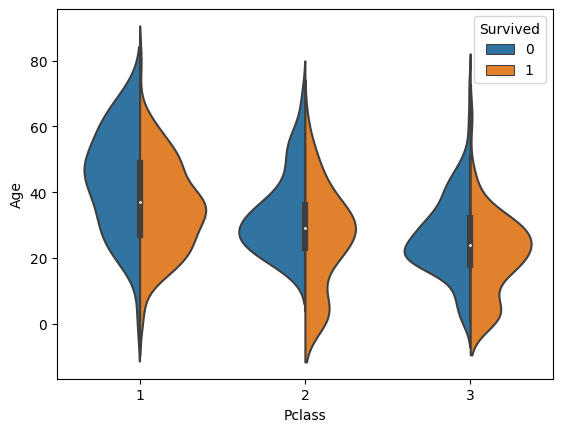

<AxesSubplot: xlabel='Sex', ylabel='Age'>

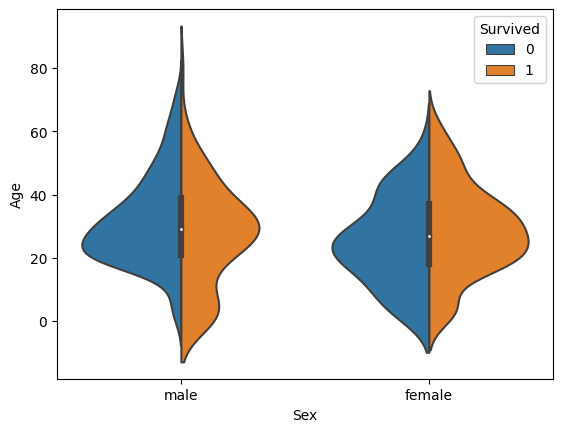

In [171]:
# representation of how Pclass and Sex and age have a influence on each other

sns.violinplot(data=train_df, x="Pclass", y="Age", hue="Survived", split=True)
plt.show()
sns.violinplot(data=train_df, x="Sex", y="Age", hue="Survived", split=True)


In [172]:
# Looking at the relation between age and initials and seeing if i can use it to fill in the blank values in age

train_df.groupby(["Initials"])["Age"].mean()

Initials
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

### French woman

- why are all the young french woman 24 years old
- and all of them are traveling alone as well
- 2 of them are in the same cabin as well
- all of them were also traveling in first class


In [173]:
# average age of MME and Mlle is tha same so just having a secondary look at it
train_df[train_df["Initials"] == "Mme"]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Family_Name
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,Mme,Aubart


In [174]:
train_df[train_df["Initials"] == "Mlle"]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Family_Name
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle,Sagesser
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle,Mayne


In [175]:
list(train_df["Initials"].unique())

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [176]:
# i am very sure initials can really help with filling in the blanks in age
Initials_short_conv = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Don": "M_N",
    "Rev": "Special",
    "Dr": "Dr",
    "Mme": "Mrs",
    "Ms": "Miss",
    "Major": "Special",
    "Lady": "F_N",
    "Sir": "M_N",
    "Mlle": "Miss",
    "Col": "Special",
    "Capt": "Special",
    "Countess": "F_N",
    "Jonkheer": "M_N",
}

Initials_unq = list(train_df["Initials"].unique())
replace_list = []
for i in Initials_unq:
    if i in Initials_short_conv:
        replace_list.append(Initials_short_conv[i])
    else:
        replace_list.append("Special")
print(replace_list)


['Mr', 'Mrs', 'Miss', 'Master', 'M_N', 'Special', 'Dr', 'Mrs', 'Miss', 'Special', 'F_N', 'M_N', 'Miss', 'Special', 'Special', 'F_N', 'M_N']


In [177]:
train_df["Initials"].replace(Initials_unq, replace_list, inplace=True)
display(train_df["Initials"])


0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Special
887       Miss
888       Miss
889         Mr
890         Mr
Name: Initials, Length: 891, dtype: object

In [178]:
Initials_age_mean = (
    train_df.groupby(["Initials"])["Age"].mean().to_frame(name="Mean_age").reset_index()
)
Initials_age_mean

,Initials,Mean_age
0,Dr,42.000000
1,F_N,40.500000
2,M_N,42.333333
3,Master,4.574167
4,Miss,21.845638
5,Mr,32.368090
6,Mrs,35.788991
7,Special,49.272727


In [179]:
type(Initials_age_mean)


pandas.core.frame.DataFrame

In [180]:
Initials_age_mean[Initials_age_mean["Initials"] == "Mr"]["Mean_age"]

5    32.36809
Name: Mean_age, dtype: float64

need to try using some form of machine learning a decision tree of a random forest and try to make a bette way of finding the ages of the missing values


In [181]:
# Replacing missing values in age with the mean of the values from the Initial

# the new unique initals are
Initials_unq = list(train_df["Initials"].unique())

train_df.loc[(train_df.Age.isnull()) & (train_df.Initials == "Mr"), "Age"] = 33

for initials in Initials_unq:
    train_df.loc[
        (train_df.Age.isnull()) & (train_df.Initials == initials), "Age"
    ] = int(Initials_age_mean[Initials_age_mean["Initials"] == initials]["Mean_age"])

print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initials         0
Family_Name      0
dtype: int64


<AxesSubplot: xlabel='Age', ylabel='Count'>

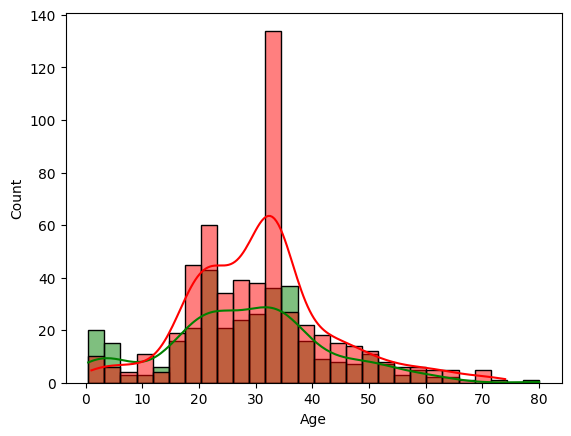

In [182]:
bins = np.histogram_bin_edges(train_df["Age"], bins="auto")
sns.histplot(train_df[train_df["Survived"]==1]["Age"], bins=bins, kde=True, color="green")
sns.histplot(train_df[train_df["Survived"]==0]["Age"], bins=bins, kde=True, color="red")

<AxesSubplot: xlabel='Age', ylabel='Count'>

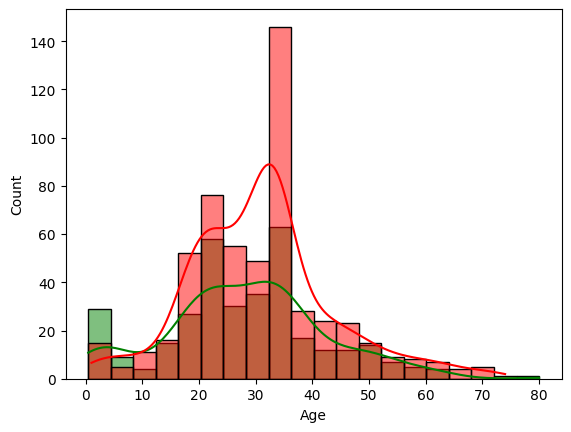

In [183]:
bins = np.histogram_bin_edges(train_df["Age"], bins=20)
sns.histplot(train_df[train_df["Survived"]==1]["Age"], bins=bins, kde=True, color="green")
sns.histplot(train_df[train_df["Survived"]==0]["Age"], bins=bins, kde=True, color="red")

In [184]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initials         0
Family_Name      0
dtype: int64

does embarkation really have an effect on how survial is dealt with ?
people who embarked from port C have a much higher chance of survival i just need to check now if its because of other factors 

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


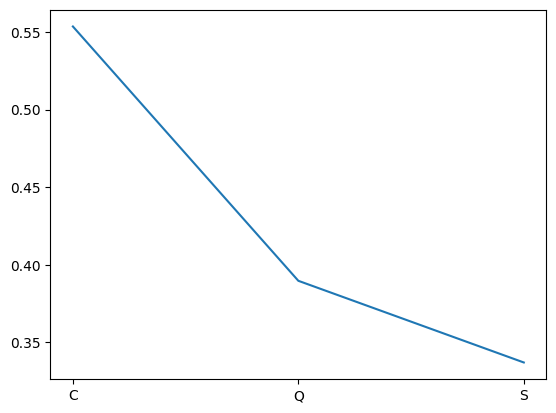

In [185]:
print(train_df.groupby(["Embarked"])["Survived"].mean())
plt.plot(train_df.groupby(["Embarked"])["Survived"].mean())

In [186]:
train_df.groupby(["Embarked", "Sex"])["Survived"].mean()

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64

In [187]:
train_df.groupby(["Embarked", "Pclass"])["Survived"].mean()

Embarked  Pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

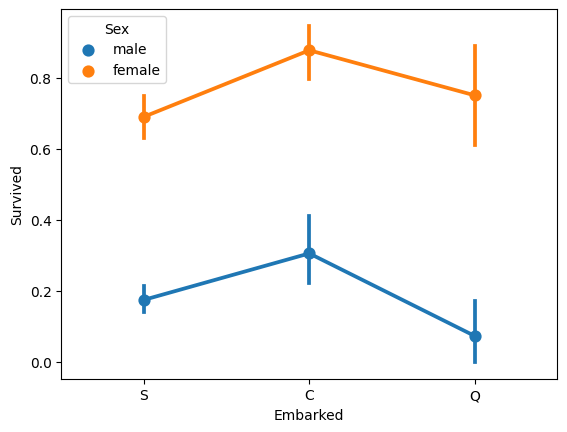

In [188]:
sns.pointplot(data=train_df, x="Embarked", y="Survived", hue="Sex")

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

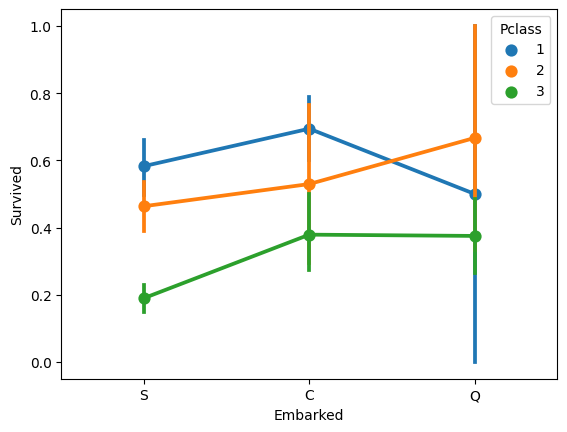

In [189]:
sns.pointplot(data=train_df, x="Embarked", y="Survived", hue="Pclass")

although it is for sure that a greater % of females and people on class 1 did board the ship from port C I dont know if i can say that the number of people that did go on board is significant enough to make a difference 

overall also a lot less people got on board at port C when we compare to other ports

In [190]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

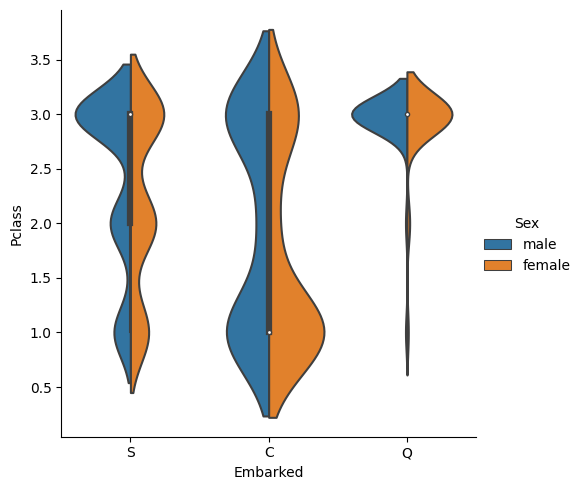

In [191]:
# I think we can say that C has the genuine advantage of having more females in the higher classes

sns.catplot(data=train_df, x="Embarked", y="Pclass", hue="Sex", kind="violin", split=True)

# Parch and Parch


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


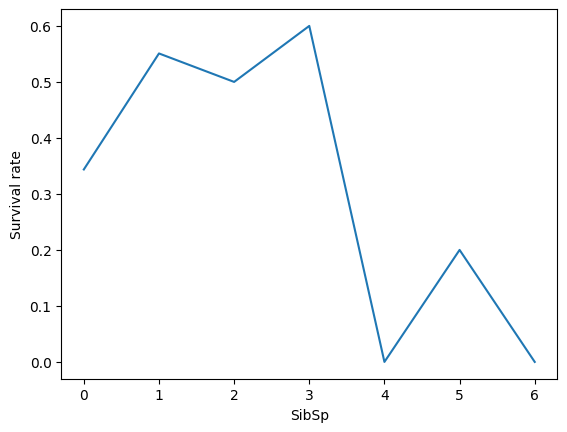

In [192]:
print(train_df.groupby(["Parch"])["Survived"].mean())
plt.plot(train_df.groupby(["Parch"])["Survived"].mean())
plt.xlabel("SibSp")
plt.ylabel("Survival rate")
plt.show()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


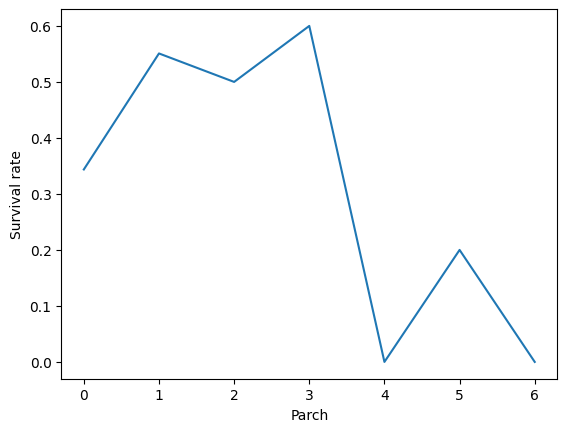

In [193]:
print(train_df.groupby(["Parch"])["Survived"].mean())
plt.plot(train_df.groupby(["Parch"])["Survived"].mean())
plt.xlabel("Parch")
plt.ylabel("Survival rate")
plt.show()

<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

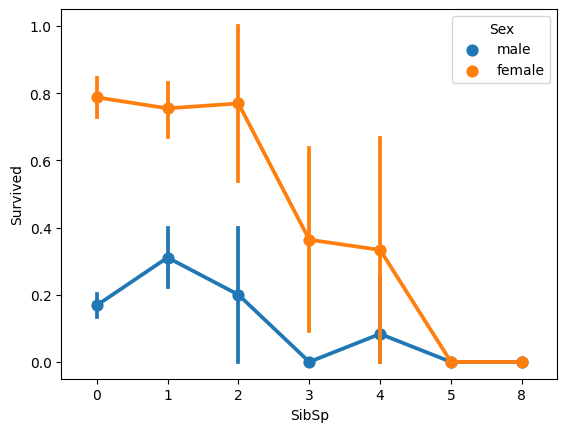

In [194]:
sns.pointplot(data=train_df, x = "SibSp", y="Survived", hue="Sex")

<AxesSubplot: xlabel='SibSp', ylabel='Sex'>

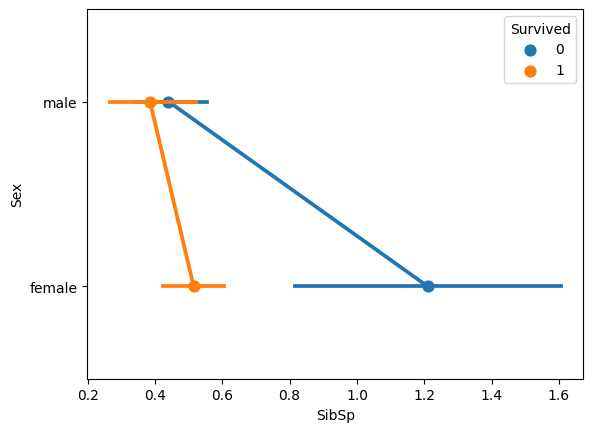

In [195]:
sns.pointplot(data=train_df, x = "SibSp", y="Sex", hue="Survived")


<AxesSubplot: xlabel='Parch', ylabel='Sex'>

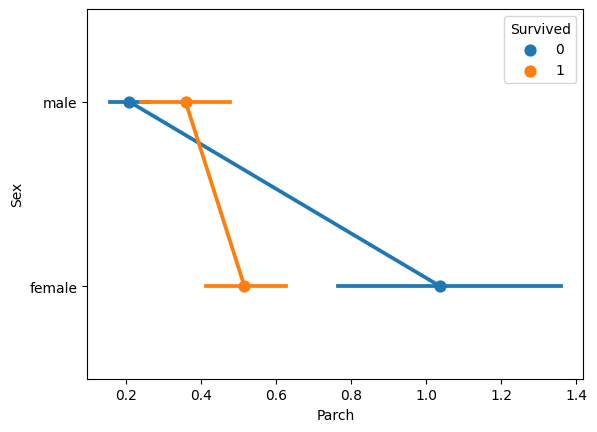

In [196]:
sns.pointplot(data=train_df, x = "Parch", y="Sex", hue="Survived")

smaller values of SibSp and Parch is always better

<AxesSubplot: xlabel='Fare', ylabel='Count'>

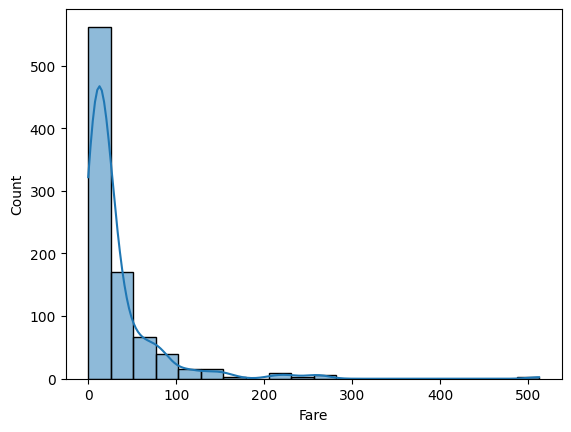

In [197]:
sns.histplot(train_df["Fare"], bins=20, kde=True)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

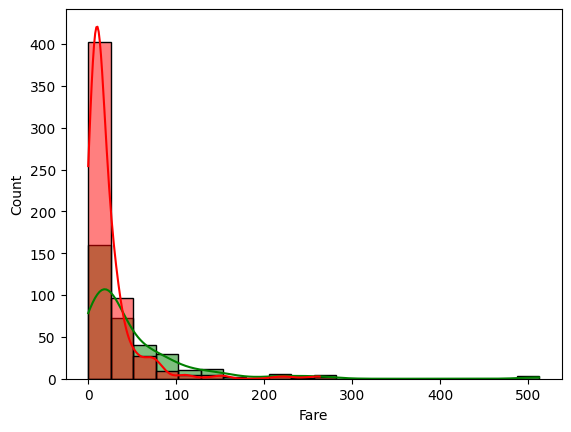

In [198]:
bins = np.histogram_bin_edges(train_df["Fare"], bins=20)
sns.histplot(train_df[train_df["Survived"]==1]["Fare"], bins=bins, kde=True, color="green")
sns.histplot(train_df[train_df["Survived"]==0]["Fare"], bins=bins, kde=True, color="red")

In [199]:
train_df.groupby(["Survived", "Pclass", "Sex"])["Fare"].mean()

Survived  Pclass  Sex   
0         1       female    110.604167
                  male       62.894910
          2       female     18.250000
                  male       19.488965
          3       female     19.773093
                  male       12.204469
1         1       female    105.978159
                  male       74.637320
          2       female     22.288989
                  male       21.095100
          3       female     12.464526
                  male       15.579696
Name: Fare, dtype: float64

In [200]:
# checking the amount of family they had on board and did it depend on different factors
train_df["Family_size"] = train_df["SibSp"] + train_df["Parch"]
display(train_df[["Family_size", "SibSp", "Parch"]])

,Family_size,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,3,1,2
889,0,0,0


In [201]:
train_df.groupby(["Family_size", "Pclass"])["Survived"].mean()

Family_size  Pclass
0            1         0.532110
             2         0.346154
             3         0.212963
1            1         0.728571
             2         0.529412
             3         0.350877
2            1         0.750000
             2         0.677419
             3         0.425532
3            1         0.714286
             2         0.769231
             3         0.666667
4            1         1.000000
             2         1.000000
             3         0.000000
5            1         0.500000
             2         1.000000
             3         0.000000
6            3         0.333333
7            3         0.000000
10           3         0.000000
Name: Survived, dtype: float64

In [202]:
train_df.groupby(["Pclass", "Family_size"])["Survived"].mean()


Pclass  Family_size
1       0              0.532110
        1              0.728571
        2              0.750000
        3              0.714286
        4              1.000000
        5              0.500000
2       0              0.346154
        1              0.529412
        2              0.677419
        3              0.769231
        4              1.000000
        5              1.000000
3       0              0.212963
        1              0.350877
        2              0.425532
        3              0.666667
        4              0.000000
        5              0.000000
        6              0.333333
        7              0.000000
        10             0.000000
Name: Survived, dtype: float64

In [203]:
train_df.groupby(["Initials", "Family_size"])["Survived"].mean()

Initials  Family_size
Dr        0              0.400000
          2              0.500000
F_N       0              1.000000
          1              1.000000
M_N       0              0.000000
          1              1.000000
Master    1              1.000000
          2              1.000000
          3              1.000000
          4              0.000000
          5              0.000000
          6              0.333333
          7              0.000000
          10             0.000000
Miss      0              0.757282
          1              0.740741
          2              0.818182
          3              0.800000
          4              0.222222
          5              0.500000
          6              0.333333
          7              0.000000
          10             0.000000
Mr        0              0.153652
          1              0.205882
          2              0.142857
          3              0.166667
          4              0.000000
          5              0